# HW3
Binary classification using Logistic regression and Lasso selection algorithm

## Download the datasets and packages

In [1]:
!pip install pandas scipy numpy sklearn > /dev/null
!wget http://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/wave_2_classes_with_irrelevant_attributes.zip
!mkdir data && cd data
!unzip ../wave_2_classes_with_irrelevant_attributes.zip

## Data preprocessing

In [269]:
# import numpy as np
import pandas as pd

def load_data(path):
    from scipy.io.arff import loadarff
    return pd.DataFrame(loadarff(path)[0])

def preprocess(dataframe):
    if 'classe' in dataframe.columns:
        dataframe.rename(columns={'classe': 'A'}, inplace=True)
    dataframe.loc[dataframe['A'] == b'A', 'A'] = 1
    dataframe.loc[dataframe['A'] == b'B', 'A'] = 0
    dataframe['A'] = pd.to_numeric(dataframe['A'])
    return dataframe.iloc[:, :-1], dataframe.iloc[:, -1]

In [303]:
# train = load_data('data/wave_2_classes_with_irrelevant_attributes.train.arff')
train.rename(columns={'classe': 'A'}, inplace=True)
train.loc[train['A'] == b'A', 'A'] = 1
train.loc[train['A'] == b'B', 'A'] = 0
train['A'] = pd.to_numeric(train['A'])

train

c:\users\ting\appdata\local\programs\python\python38\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
c:\users\ting\appdata\local\programs\python\python38\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,alea92,alea93,alea94,alea95,alea96,alea97,alea98,alea99,alea100,A
0,-0.38,-0.72,1.30,3.04,2.10,3.63,4.59,3.55,0.76,4.58,...,0.79,0.20,0.22,0.21,0.42,0.76,0.95,0.86,0.07,1
1,-0.33,0.04,0.83,0.70,3.26,1.73,3.48,3.52,1.45,1.91,...,0.20,0.86,0.83,0.95,0.48,0.96,0.20,0.73,0.71,1
2,0.48,0.94,2.49,2.82,2.93,5.55,3.48,5.65,5.01,3.90,...,0.42,0.77,0.94,0.51,0.15,0.89,0.62,0.31,0.21,1
3,0.57,1.15,1.71,2.45,0.60,2.32,2.29,1.74,1.84,3.16,...,0.00,0.51,0.29,0.38,0.07,0.83,0.18,0.82,0.76,1
4,-1.99,-1.87,1.03,2.07,3.42,3.71,6.98,3.87,1.16,2.85,...,0.02,0.48,0.15,0.05,0.26,0.72,0.03,0.18,0.84,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.18,0.96,1.72,3.58,2.10,2.40,3.24,3.68,5.33,4.92,...,0.11,0.52,0.98,0.65,0.82,0.83,0.69,0.47,0.25,0
9996,-0.07,1.59,0.87,-0.42,0.58,1.26,5.07,4.65,4.10,3.64,...,0.77,0.29,0.64,0.34,0.86,0.72,0.88,0.48,0.54,0
9997,2.04,-0.79,2.46,1.08,2.84,4.37,6.50,5.47,3.67,2.29,...,0.28,0.82,0.13,0.75,0.71,0.82,0.63,0.76,0.88,0
9998,0.59,1.54,0.81,1.09,2.37,4.87,5.27,4.81,6.03,4.29,...,0.55,0.24,0.53,0.84,0.32,0.05,0.03,0.42,0.32,0


In [299]:
training_data = load_data('data/wave_2_classes_with_irrelevant_attributes.train.arff')
testing_data = load_data('data/wave_2_classes_with_irrelevant_attributes.test.arff')

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,alea92,alea93,alea94,alea95,alea96,alea97,alea98,alea99,alea100,classe
0,-0.38,-0.72,1.30,3.04,2.10,3.63,4.59,3.55,0.76,4.58,...,0.79,0.20,0.22,0.21,0.42,0.76,0.95,0.86,0.07,b'A'
1,-0.33,0.04,0.83,0.70,3.26,1.73,3.48,3.52,1.45,1.91,...,0.20,0.86,0.83,0.95,0.48,0.96,0.20,0.73,0.71,b'A'
2,0.48,0.94,2.49,2.82,2.93,5.55,3.48,5.65,5.01,3.90,...,0.42,0.77,0.94,0.51,0.15,0.89,0.62,0.31,0.21,b'A'
3,0.57,1.15,1.71,2.45,0.60,2.32,2.29,1.74,1.84,3.16,...,0.00,0.51,0.29,0.38,0.07,0.83,0.18,0.82,0.76,b'A'
4,-1.99,-1.87,1.03,2.07,3.42,3.71,6.98,3.87,1.16,2.85,...,0.02,0.48,0.15,0.05,0.26,0.72,0.03,0.18,0.84,b'A'


In [92]:
X_train, y_train = preprocess(training_data)
print('label', 'count')
y_train.value_counts()

label count


1    5006
0    4994
Name: A, dtype: int64

In [93]:
X_test, y_test = preprocess(testing_data)
print('label', 'count')
y_test.value_counts()

label count


1    11760
0    11574
Name: A, dtype: int64

## Logistic regression without model selection

7.881203394188738 %


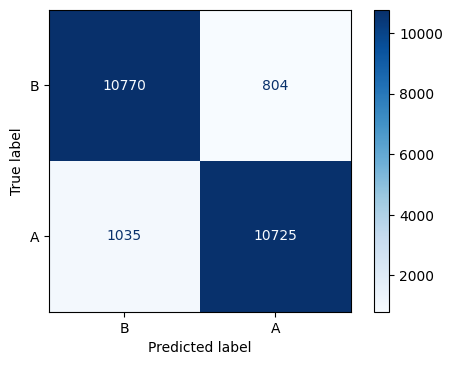

In [294]:
from sklearn.linear_model import LogisticRegression

def logistic(X_train, y_train, X_test, y_test):
    model = LogisticRegression(random_state=0, max_iter=200).fit(X_train, y_train)
    error_rate(model, X_test, y_test)
    estimate(model, X_test, y_test)

logistic(X_train, y_train, X_test, y_test)
# pd.crosstab(y_pred, y_test)

## Lasso feature selection

## Logistic regression with feature selection

In [305]:
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(LogisticRegression(C=0.007, penalty='l1', solver='liblinear')).fit(X_train, y_train)
# sel.transform(X_train)
var = sel.get_support()

b = pd.Series(var)
unique, counts = np.unique(b, return_counts=True)
print(dict(zip(unique, counts)))
var
X_train.loc[:, var]

{False: 106, True: 15}


,v3,v4,v5,v6,v7,v9,v10,v11,v12,v14,v15,v16,v17,v18,v19
0,1.30,3.04,2.10,3.63,4.59,0.76,4.58,1.78,0.97,-0.95,2.98,1.78,0.79,3.62,1.12
1,0.83,0.70,3.26,1.73,3.48,1.45,1.91,3.64,0.82,3.12,2.57,0.33,5.49,1.48,0.66
2,2.49,2.82,2.93,5.55,3.48,5.01,3.90,1.95,0.44,1.47,-0.09,0.45,0.24,-0.85,-0.97
3,1.71,2.45,0.60,2.32,2.29,1.84,3.16,2.05,1.25,2.92,2.29,2.84,-0.05,1.28,0.79
4,1.03,2.07,3.42,3.71,6.98,1.16,2.85,1.89,0.90,2.69,2.52,1.88,-0.42,1.58,0.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.72,3.58,2.10,2.40,3.24,5.33,4.92,5.64,2.62,1.77,1.56,0.50,-0.22,-0.89,2.02
9996,0.87,-0.42,0.58,1.26,5.07,4.10,3.64,2.55,3.89,2.35,1.63,1.34,0.31,-0.50,0.62
9997,2.46,1.08,2.84,4.37,6.50,3.67,2.29,3.73,1.22,1.14,-1.60,-0.45,0.40,-0.49,-0.26
9998,0.81,1.09,2.37,4.87,5.27,6.03,4.29,3.81,2.77,2.37,1.74,-0.25,0.36,1.01,0.81


7.799777149224307 %


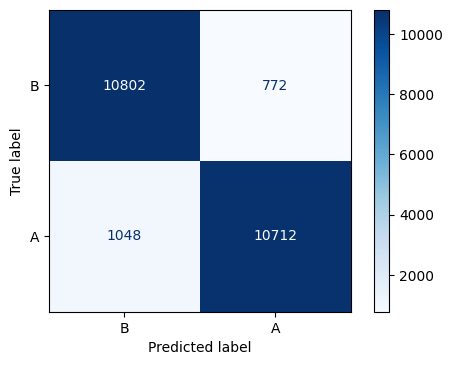

In [295]:
logistic(X_train.loc[:, var], y_train, X_test.loc[:, var], y_test)

## Estimation

In [256]:
def estimate(model, X_test, y_test):
    import matplotlib.pyplot as plt
    from sklearn.metrics import plot_confusion_matrix
        
    fig, ax = plt.subplots(dpi=100.0)
    ax.grid(False)
    plot_confusion_matrix(model, X_test, y_test,
                          display_labels=('B', 'A'),
                          cmap=plt.cm.Blues,
                          normalize=None,
                          ax=ax,)
    plt.show()
    
def error_rate(model, X_test, y_test):
    from sklearn.metrics import confusion_matrix
    y_pred = model.predict(X_test)
    matrix = confusion_matrix(y_test, y_pred)
    error = (matrix[0, 1] + matrix[1, 0]) / matrix.sum() * 100
    return error
    
#     fig, ax = plt.subplots(dpi=100.0)
#     ax.grid(False)
#     plot_confusion_matrix(model, X_test, y_test,
#                           display_labels=('B', 'A'),
#                           cmap=plt.cm.Blues,
#                           normalize='all',
#                           ax=ax,)
#     plt.show()